In this assignment, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:

 - Use a pre-built implementation of regression to run polynomial regression
 - Use matplotlib to visualize polynomial regressions
 - Use a pre-built implementation of regression to run polynomial regression, this time with L2 penalty
 - Use matplotlib to visualize polynomial regressions under L2 regularization
 - Choose best L2 penalty using cross-validation.
 - Assess the final fit using test data.
 <br><br><br>
We will continue to use the House data from previous assignments. (In the next programming assignment for this module, you will implement your own ridge regression learning algorithm using gradient descent.)

In [1]:
import pandas as pd

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [2]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


In [3]:
sales['price']

19452     142000.0
15381     276000.0
860       245000.0
18379     265000.0
4868      228000.0
           ...    
8092     4668000.0
9254     6885000.0
3914     7062500.0
7252     7700000.0
12777    2280000.0
Name: price, Length: 21613, dtype: float64

In [4]:
l2_small_penalty = 1.5e-5
import seaborn as sns
import matplotlib.pyplot as plt

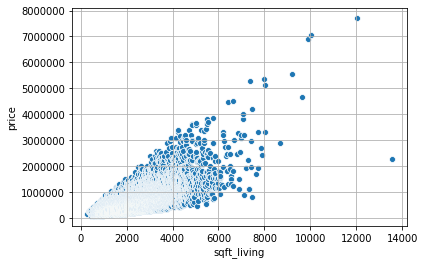

In [5]:
sns.scatterplot('sqft_living','price',data=sales)
plt.style.use('ggplot')
plt.grid(5)

In [6]:
from sklearn.preprocessing import PolynomialFeatures


In [7]:
pr=PolynomialFeatures(degree=15)
pr

PolynomialFeatures(degree=15, include_bias=True, interaction_only=False,
                   order='C')

In [8]:
Z = sales[['sqft_living']]

In [9]:
Z_pr=pr.fit_transform(Z)

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge(alpha=l2_small_penalty, normalize=True)
parameters={'alpha':[1.5e-15]}
#ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
r=ridge.fit(Z_pr,sales['price'])

In [11]:
r.coef_

array([ 0.00000000e+00,  1.24873306e+02, -4.77376011e-02,  3.01446238e-05,
       -2.44419942e-09, -1.94153675e-13,  8.54085686e-18,  1.51142121e-21,
        8.27979094e-26,  6.52603100e-31, -3.27895017e-34, -3.87962315e-38,
       -2.72437650e-42, -1.07790800e-46,  3.78242694e-51,  1.39790296e-54])

In [12]:
"1.24873306e+02".format('%.3f')

'1.24873306e+02'

In [13]:
int(1.24873306e+02)

124

In [14]:
# dtype_dict same as above
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [15]:
pr=PolynomialFeatures(degree=3)


In [16]:
Z_pr31 = pr.fit_transform(set_1[['sqft_living']])

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge(alpha=1e-9, normalize=True)
#parameters={'alpha':[1e-9]}
#ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
r31=ridge.fit(Z_pr31,set_1['price'])

In [18]:
r31.coef_[1]

-120.09778046948576

In [19]:
Z_pr32 = pr.fit_transform(set_2[['sqft_living']])

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge(alpha=1e-9, normalize=True)
#parameters={'alpha':[1e-9]}
#ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
r32=ridge.fit(Z_pr32,set_2['price'])

r32.coef_[1]

-1.3131350932967234

In [20]:
Z_pr33 = pr.fit_transform(set_3[['sqft_living']])

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge(alpha=1e-9, normalize=True)
#parameters={'alpha':[1e-9]}
#ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
r33=ridge.fit(Z_pr33,set_3['price'])

r33.coef_[1]

78.62276964768745

In [21]:
Z_pr34 = pr.fit_transform(set_4[['sqft_living']])

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge(alpha=1e-9, normalize=True)
#parameters={'alpha':[1e-9]}
#ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
r34=ridge.fit(Z_pr34,set_4['price'])

r34.coef_[1]

-47.28870130798362

In [22]:
pr=PolynomialFeatures(degree=15)
pr

PolynomialFeatures(degree=15, include_bias=True, interaction_only=False,
                   order='C')

In [23]:
Z_pr154 = pr.fit_transform(set_4[['sqft_living']])

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge(alpha=1.23e2, normalize=True)
#parameters={'alpha':[1e-9]}
#ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
r154=ridge.fit(Z_pr154,set_4['price'])

r154.coef_[1]

2.0859619409193075

In [24]:
Z_pr153 = pr.fit_transform(set_3[['sqft_living']])

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge(alpha=1.23e2, normalize=True)
#parameters={'alpha':[1e-9]}
#ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
r153=ridge.fit(Z_pr153,set_3['price'])

r153.coef_[1]

2.2890625811892034

In [25]:
Z_pr152 = pr.fit_transform(set_2[['sqft_living']])

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge(alpha=1.23e2, normalize=True)
#parameters={'alpha':[1e-9]}
#ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
r152=ridge.fit(Z_pr152,set_2['price'])

r152.coef_[1]

2.097569027778553

In [26]:
Z_pr151 = pr.fit_transform(set_1[['sqft_living']])

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge(alpha=1.23e2, normalize=True)
#parameters={'alpha':[1e-9]}
#ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
r151=ridge.fit(Z_pr151,set_1['price'])

r151.coef_[1]

2.3280680295793235

In [27]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [28]:
pr=PolynomialFeatures(degree=15)
pr


PolynomialFeatures(degree=15, include_bias=True, interaction_only=False,
                   order='C')

In [29]:
x = pr.fit_transform(train_valid_shuffled[['sqft_living']])

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[41,42,43,44,45,45.5,46,47,48,1000]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(x,train_valid_shuffled['price'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.47889e-123): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.58813e-123): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.69737e-123): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.80661e-123): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.97047e-123): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\line

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [41, 42, 43, 44, 45, 45.5, 46, 47, 48, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [31]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 46}
-9.685304814570113e+17


In [32]:
yp=ridge_regressor.predict(pr.fit_transform(test[['sqft_living']]))

In [33]:
yp

array([3682562.97670965, 3738616.13312001, 3885498.59833341, ...,
       1057849.17556901, 3887482.83028211, 3885085.66829254])

In [34]:
y = test['price'].values

In [35]:
y

array([323000., 530000., 189000., ..., 608500., 230000., 414500.])

In [36]:
x = yp-y

In [37]:
x

array([3359562.97670965, 3208616.13312001, 3696498.59833341, ...,
        449349.17556901, 3657482.83028211, 3470585.66829254])

In [38]:
x = x**2

In [39]:
x.sum()

5.030373774678173e+17